In [1]:
# импорт основных необходимых библиотек
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
data = pd.read_csv('data_test.csv', sep=';') # записываем данные из файла csv в DataFrame

In [3]:
data.shape #просмотр количества записей и количества столбцов

(100, 11)

In [4]:
data.head() #просмотр первых 5 записей чтобы убедиться в том что данные корректно отображаются

,id,oformleniye_zakaz,sozdaniye_maketa,razmer_patii,proizvodstvo_odnoy_detali,oborudovaniye,itogo,data_nachala,data_kontsa,raznitsa_v_dnyakh,rabochiye_chasy
0,1,6,19,30,1,5,31,12.05.2021,17.07.2021,66,792
1,2,16,9,4,2,1,33,18.05.2021,08.09.2021,113,1356
2,3,11,11,14,1,4,26,12.05.2021,08.07.2021,57,684
3,4,12,23,99,1,2,85,20.04.2021,14.07.2021,85,1020
4,5,8,20,16,1,2,36,18.05.2021,08.09.2021,113,1356


In [5]:
data.info() #получение информации по каждому из столбцов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 11 columns):
 #   Column                     Non-Null Count  Dtype 
---  ------                     --------------  ----- 
 0   id                         100 non-null    int64 
 1   oformleniye_zakaz          100 non-null    int64 
 2   sozdaniye_maketa           100 non-null    int64 
 3   razmer_patii               100 non-null    int64 
 4   proizvodstvo_odnoy_detali  100 non-null    int64 
 5   oborudovaniye              100 non-null    int64 
 6   itogo                      100 non-null    int64 
 7   data_nachala               100 non-null    object
 8   data_kontsa                100 non-null    object
 9   raznitsa_v_dnyakh          100 non-null    int64 
 10  rabochiye_chasy            100 non-null    int64 
dtypes: int64(9), object(2)
memory usage: 8.7+ KB


In [6]:
data.describe().round(2) #получение описательных характеристик столбцов

,id,oformleniye_zakaz,sozdaniye_maketa,razmer_patii,proizvodstvo_odnoy_detali,oborudovaniye,itogo,raznitsa_v_dnyakh,rabochiye_chasy
count,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00,100.00
mean,50.50,10.63,15.73,14.22,2.53,3.05,35.91,84.59,1015.08
std,29.01,3.68,4.93,19.69,2.02,1.34,13.47,27.33,327.99
min,1.00,4.00,8.00,2.00,1.00,1.00,18.00,57.00,684.00
25%,25.75,8.00,11.00,4.00,1.00,2.00,27.00,58.00,696.00
50%,50.50,11.00,15.50,7.00,2.00,3.00,32.50,68.00,816.00
75%,75.25,14.00,20.00,14.00,3.00,4.00,40.25,113.00,1356.00
max,100.00,16.00,24.00,102.00,9.00,8.00,89.00,131.00,1572.00


In [7]:
data.drop(['id','data_nachala','data_kontsa'], axis=1, inplace = True) # удаление столбцов которые 100% не пригодятся 

In [9]:
data.head() # просмотр данных после удаления столбцов

,oformleniye_zakaz,sozdaniye_maketa,razmer_patii,proizvodstvo_odnoy_detali,oborudovaniye,itogo,raznitsa_v_dnyakh,rabochiye_chasy
0,6,19,30,1,5,31,66,792
1,16,9,4,2,1,33,113,1356
2,11,11,14,1,4,26,57,684
3,12,23,99,1,2,85,85,1020
4,8,20,16,1,2,36,113,1356


In [10]:
data.corr().round(2) # матрица корреляции поможет определить какие признаки имеют наибольшую взаимосвязь

,oformleniye_zakaz,sozdaniye_maketa,razmer_patii,proizvodstvo_odnoy_detali,oborudovaniye,itogo,raznitsa_v_dnyakh,rabochiye_chasy
oformleniye_zakaz,1.00,-0.07,0.01,-0.06,-0.13,0.38,0.04,0.04
sozdaniye_maketa,-0.07,1.00,0.24,-0.20,0.19,0.39,0.06,0.06
razmer_patii,0.01,0.24,1.00,-0.32,0.07,0.68,-0.23,-0.23
proizvodstvo_odnoy_detali,-0.06,-0.20,-0.32,1.00,-0.04,-0.02,-0.19,-0.19
oborudovaniye,-0.13,0.19,0.07,-0.04,1.00,-0.27,-0.14,-0.14
itogo,0.38,0.39,0.68,-0.02,-0.27,1.00,-0.25,-0.25
raznitsa_v_dnyakh,0.04,0.06,-0.23,-0.19,-0.14,-0.25,1.00,1.00
rabochiye_chasy,0.04,0.06,-0.23,-0.19,-0.14,-0.25,1.00,1.00


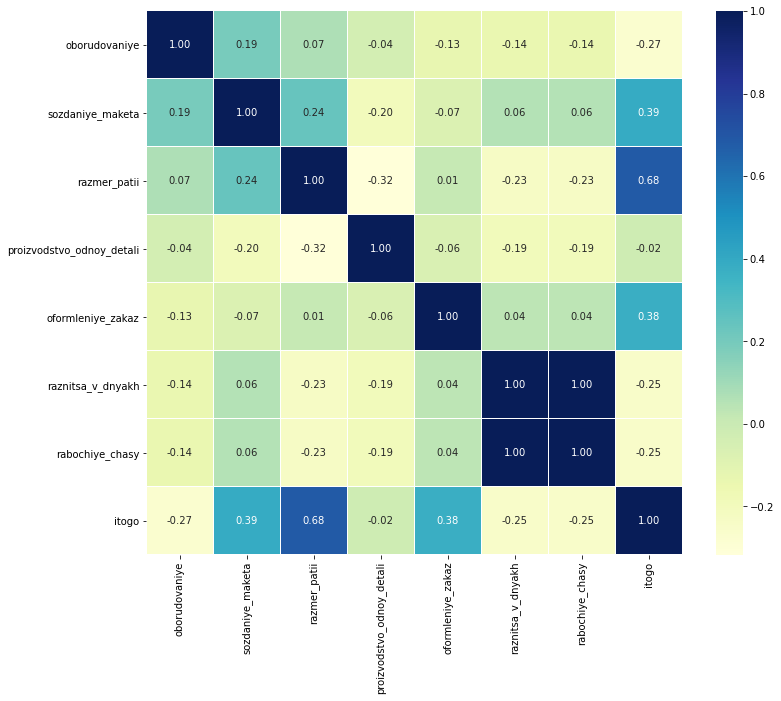

In [11]:
k = 15
cols = data.corr().nlargest(k, 'oborudovaniye')['oborudovaniye'].index
cm = np.corrcoef(data[cols].values.T)
f, ax = plt.subplots(figsize=(12,10))
sns.heatmap(cm, ax=ax, cmap="YlGnBu", linewidths=0.1, yticklabels=cols.values,
           xticklabels = cols.values, annot=True, fmt=".2f")

C:\Users\olegs\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\olegs\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\olegs\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\olegs\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\olegs\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data must have variance to compute a kernel density estimate.
  warnings.warn(msg, UserWarning)
C:\Users\olegs\anaconda3\lib\site-packages\seaborn\distributions.py:283: UserWarning: Data

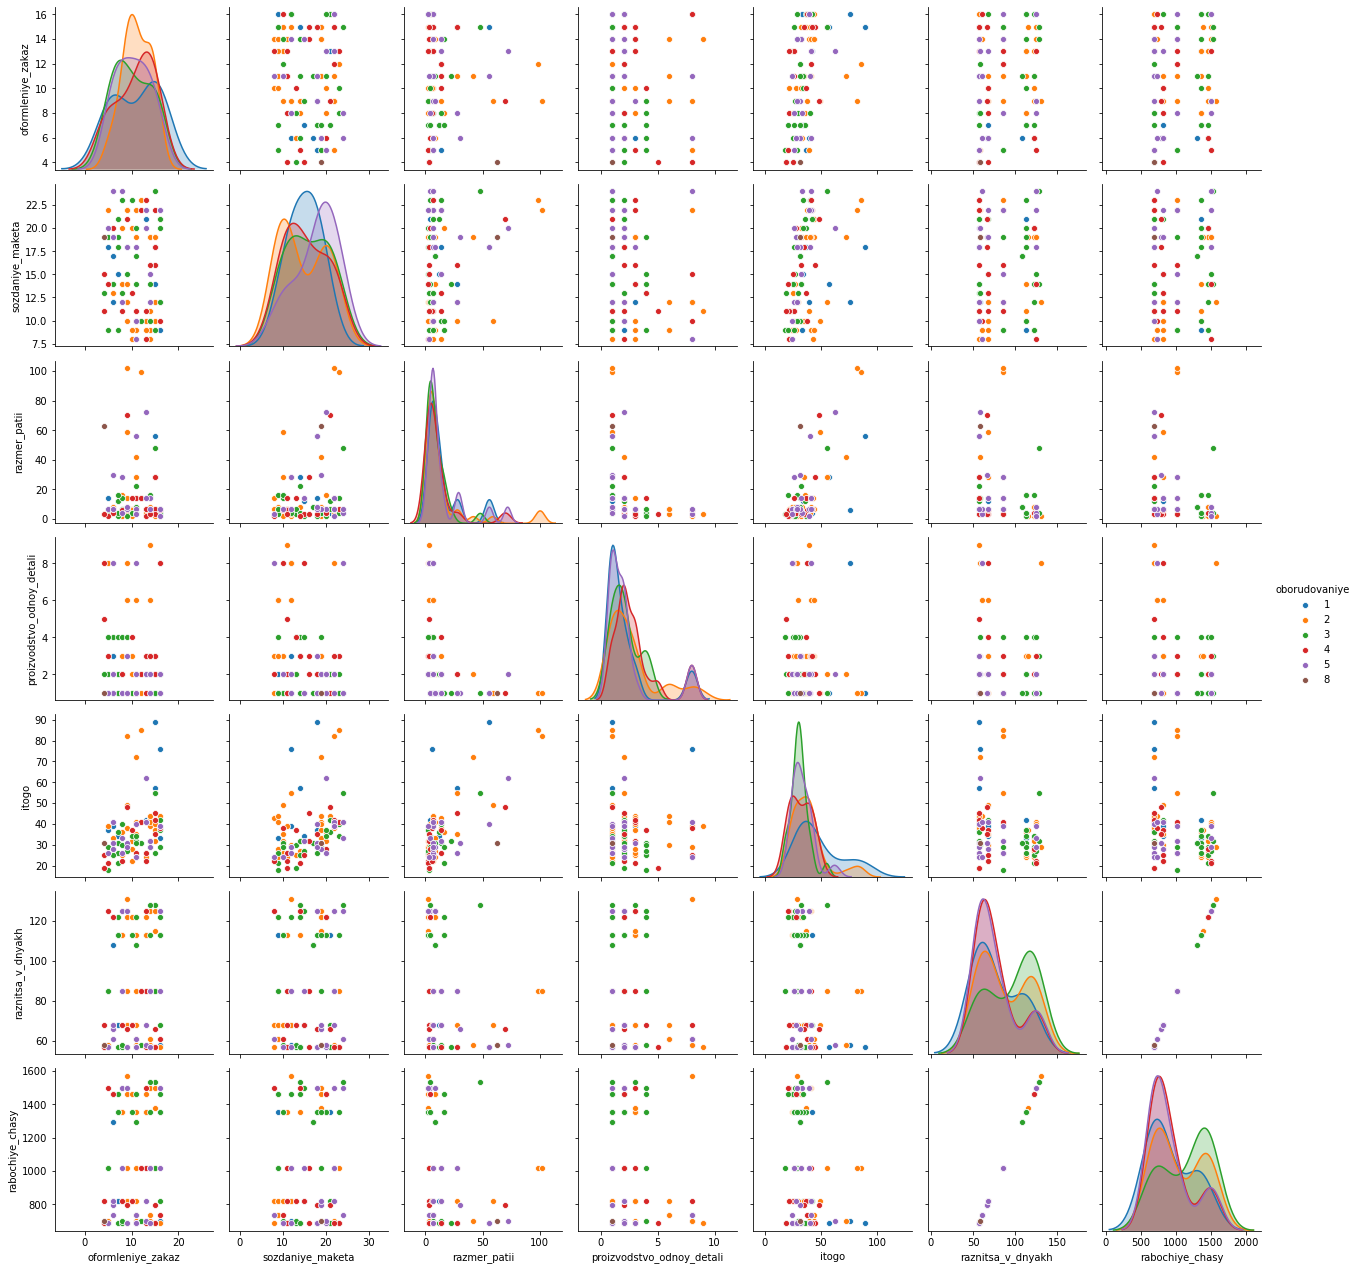

In [12]:
sns.pairplot(data, hue='oborudovaniye')

In [13]:
data_first = data # делаем копию данных чтобы сохранить все наши преобразования
data_first.head()

,oformleniye_zakaz,sozdaniye_maketa,razmer_patii,proizvodstvo_odnoy_detali,oborudovaniye,itogo,raznitsa_v_dnyakh,rabochiye_chasy
0,6,19,30,1,5,31,66,792
1,16,9,4,2,1,33,113,1356
2,11,11,14,1,4,26,57,684
3,12,23,99,1,2,85,85,1020
4,8,20,16,1,2,36,113,1356


In [14]:
data_first.info() #получение информации по каждому из столбцов

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100 entries, 0 to 99
Data columns (total 8 columns):
 #   Column                     Non-Null Count  Dtype
---  ------                     --------------  -----
 0   oformleniye_zakaz          100 non-null    int64
 1   sozdaniye_maketa           100 non-null    int64
 2   razmer_patii               100 non-null    int64
 3   proizvodstvo_odnoy_detali  100 non-null    int64
 4   oborudovaniye              100 non-null    int64
 5   itogo                      100 non-null    int64
 6   raznitsa_v_dnyakh          100 non-null    int64
 7   rabochiye_chasy            100 non-null    int64
dtypes: int64(8)
memory usage: 6.4 KB


In [15]:
# разделение набора данных на обучающую и тестовую выборки
from sklearn.model_selection import train_test_split

X = data_first.drop(["oborudovaniye"], axis=1)
y = data_first["oborudovaniye"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1) # делим данные на тестовые и тренировочные

In [16]:
# метод k-ближайших соседей

from sklearn.neighbors import KNeighborsClassifier

knn = KNeighborsClassifier(n_neighbors = 3)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=3)

In [17]:
predKnn = knn.predict(X_test) # осуществляем прогноз

In [18]:
predKnn[:5] # прогноз первых 5

array([1, 2, 3, 2, 2], dtype=int64)

In [19]:
knn.score(X_train, y_train) # смотрим точность

0.5522388059701493

In [20]:
# логистическая регрессия

from sklearn.linear_model import LogisticRegression

lr = LogisticRegression(C=3)
lr.fit(X_train, y_train)

C:\Users\olegs\anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:762: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression(C=3)

In [21]:
predLr = lr.predict(X_test)

In [22]:
predLr[:5]

array([2, 2, 3, 3, 2], dtype=int64)

In [23]:
lr.score(X_train, y_train)

0.47761194029850745

In [24]:
# случайный лес
from sklearn.ensemble import RandomForestClassifier

rfc = RandomForestClassifier(criterion='entropy',n_estimators=50,min_samples_split=10,
                               min_samples_leaf=1,max_features='auto', n_jobs=-1)
rfc.fit(X_train, y_train)

RandomForestClassifier(criterion='entropy', min_samples_split=10,
                       n_estimators=50, n_jobs=-1)

In [25]:
predRfc = rfc.predict(X_test)

In [26]:
predRfc[:5]

array([2, 2, 2, 3, 3], dtype=int64)

In [27]:
rfc.score(X_train, y_train)

0.6865671641791045

In [30]:
data_second = data # осуществляем новую выборку данных и делим их на тетсовые и тренировочные
X = data_second.drop(["oborudovaniye"], axis=1)
y = data_second["oborudovaniye"]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=1)

In [31]:
model_rfc = RandomForestClassifier(n_estimators=70) # подбор модели
model_rfc.fit(X_train, y_train).predict(X_test)

print("Точность обучающей выборки: {:.3f}".format(model_rfc.score(X_train, y_train)))
print("Точность тестовой выборки: {:.3f}".format(model_rfc.score(X_test, y_test)))

Точность обучающей выборки: 1.000
Точность тестовой выборки: 0.303


In [32]:
rnd_forest = RandomForestClassifier(criterion='entropy',n_estimators=100,min_samples_split=10,min_samples_leaf=1,max_features='auto',
n_jobs=-1)
rnd_forest.fit(X_train, y_train)
Y_prediction = rnd_forest.predict(X_train)
rnd_forest.score(X_train, y_train)
rez_rnd_forest = round(rnd_forest.score(X_train, y_train) * 100, 2)
print(rez_rnd_forest,"%") # выбор модели

77.61 %
